# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats

rcParams['figure.figsize'] = 20, 10
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load Dataset

In [2]:
df_sumber = pd.read_csv ('hotel_booking1.csv')
pd.set_option('display.max_columns', None) #show all column
df_sumber.sample(10)

hotel  is_canceled  lead_time  arrival_date_year  \
98334     City Hotel            0          1               2016   
105094    City Hotel            0         41               2017   
61429     City Hotel            1         74               2016   
116155    City Hotel            0         27               2017   
4124    Resort Hotel            1         72               2016   
55188     City Hotel            0        217               2016   
72781     City Hotel            1         84               2017   
47810     City Hotel            1         61               2016   
99909     City Hotel            0        153               2016   
70195     City Hotel            1        173               2017   

       arrival_date_month  arrival_date_week_number  \
98334           September                        40   
105094            January                         4   
61429            December                        50   
116155               July                        28   
4124             February                         8   
55188              August                        33   
72781              August                        32   
47810               March                        10   
99909             October                        43   
70195                June                        24   

        arrival_date_day_of_month  stays_in_weekend_nights  \
98334                          27                        0   
105094                         26                        0   
61429                          10                        0   
116155                         14                        0   
4124                           14                        2   
55188                           7                        2   
72781                           6                        2   
47810                           4                        1   
99909                          16                        2   
70195                          11                        2   

        stays_in_week_nights  adults  children  babies meal country  \
98334                      1       2       0.0       0   BB     PRT   
105094                     3       2       0.0       0   BB     ESP   
61429                      1       2       0.0       0   HB     FRA   
116155                     2       1       0.0       0   SC     DEU   
4124                       2       2       2.0       0   BB     PRT   
55188                      1       2       2.0       0   BB     FRA   
72781                      1       2       1.0       0   BB     GBR   
47810                      2       2       0.0       0   BB     ITA   
99909                      2       2       0.0       0   SC     GBR   
70195                      3       2       0.0       0   BB     PRT   

       market_segment distribution_channel  is_repeated_guest  \
98334       Online TA                TA/TO                  0   
105094         Direct               Direct                  0   
61429       Online TA                TA/TO                  0   
116155      Online TA                TA/TO                  0   
4124        Online TA                TA/TO                  0   
55188       Online TA                TA/TO                  0   
72781          Direct               Direct                  0   
47810       Online TA                TA/TO                  0   
99909   Offline TA/TO                TA/TO                  0   
70195          Groups                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
98334                        0                               0   
105094                       0                               0   
61429                        0                               0   
116155                       0                               0   
4124                         0                               0   
55188                        0                               0   
72781                       

# Missing Value

In [3]:
# Percentage dari missing Value

percent_missing = df_sumber.isnull().sum() * 100 / len(df_sumber)
missing_value_df = pd.DataFrame({'column_name': df_sumber.columns,
                                 ' total_missing' : df_sumber.isnull().sum(),
                                 'percent_missing': round(percent_missing,3)})
missing_value_df 

column_name  \
hotel                                                    hotel   
is_canceled                                        is_canceled   
lead_time                                            lead_time   
arrival_date_year                            arrival_date_year   
arrival_date_month                          arrival_date_month   
arrival_date_week_number              arrival_date_week_number   
arrival_date_day_of_month            arrival_date_day_of_month   
stays_in_weekend_nights                stays_in_weekend_nights   
stays_in_week_nights                      stays_in_week_nights   
adults                                                  adults   
children                                              children   
babies                                                  babies   
meal                                                      meal   
country                                                country   
market_segment                                  market_segment   
distribution_channel                      distribution_channel   
is_repeated_guest                            is_repeated_guest   
previous_cancellations                  previous_cancellations   
previous_bookings_not_canceled  previous_bookings_not_canceled   
reserved_room_type                          reserved_room_type   
assigned_room_type                          assigned_room_type   
booking_changes                                booking_changes   
deposit_type                                      deposit_type   
agent                                                    agent   
company                                                company   
days_in_waiting_list                      days_in_waiting_list   
customer_type                                    customer_type   
adr                                                        adr   
required_car_parking_spaces        required_car_parking_spaces   
total_of_special_requests            total_of_special_requests   
reservation_status                          reservation_status   
reservation_status_date                reservation_status_date   
name                                                      name   
email                                                    email   
phone-number                                      phone-number   
credit_card                                        credit_card   

                                 total_missing  percent_missing  
hotel                                        0            0.000  
is_canceled                                  0            0.000  
lead_time                                    0            0.000  
arrival_date_year                            0            0.000  
arrival_date_month                           0            0.000  
arrival_date_week_number                     0            0.000  
arrival_date_day_of_month                    0            0.000  
stays_in_weekend_nights                      0            0.000  
stays_in_week_nights                         0            0.000  
adults                                       0            0.000  
children                                     4            0.003  
babies                                       0            0.000  
meal                                         0            0.000  
country                                    488            0.409  
market_segment                               0            0.000  
distribution_channel                         0            0.000  
is_repeated_guest                            0            0.000  
previous_cancellations                       0            0.000  
previous_bookings_not_canceled               0            0.000  
reserved_room_type                           0            0.000  
assigned_room_type                           0            0.000  
booking_changes                              0            0.000  
deposit_type                                 0            0.000  
agent                   

Jadi ada 4 kolom yang memiliki missing value atau nilai kosong yaitu :<br>
1. `Children` : 4 baris atau 0.003%
2. `Country` : 488 baris atau  0.409%
3. `Agent` : 16.340 baris atau  13.686 %
4. `Company` : 112.593 baris atau 94.307%

In [4]:
# Fill Missing Value

df_sumber['children'].fillna(df_sumber['children'].mode()[0], inplace=True)
df_sumber['country'].fillna(df_sumber['country'].mode()[0], inplace=True)
df_sumber['agent'] = df_sumber['agent'].fillna(0)
df_sumber['company'] = df_sumber['company'].fillna(0)

In [5]:
percent_missing = df_sumber.isnull().sum() * 100 / len(df_sumber)
missing_value_df = pd.DataFrame({'column_name': df_sumber.columns,
                                 ' total_missing' : df_sumber.isnull().sum(),
                                 'percent_missing': round(percent_missing,3)})
missing_value_df 

column_name  \
hotel                                                    hotel   
is_canceled                                        is_canceled   
lead_time                                            lead_time   
arrival_date_year                            arrival_date_year   
arrival_date_month                          arrival_date_month   
arrival_date_week_number              arrival_date_week_number   
arrival_date_day_of_month            arrival_date_day_of_month   
stays_in_weekend_nights                stays_in_weekend_nights   
stays_in_week_nights                      stays_in_week_nights   
adults                                                  adults   
children                                              children   
babies                                                  babies   
meal                                                      meal   
country                                                country   
market_segment                                  market_segment   
distribution_channel                      distribution_channel   
is_repeated_guest                            is_repeated_guest   
previous_cancellations                  previous_cancellations   
previous_bookings_not_canceled  previous_bookings_not_canceled   
reserved_room_type                          reserved_room_type   
assigned_room_type                          assigned_room_type   
booking_changes                                booking_changes   
deposit_type                                      deposit_type   
agent                                                    agent   
company                                                company   
days_in_waiting_list                      days_in_waiting_list   
customer_type                                    customer_type   
adr                                                        adr   
required_car_parking_spaces        required_car_parking_spaces   
total_of_special_requests            total_of_special_requests   
reservation_status                          reservation_status   
reservation_status_date                reservation_status_date   
name                                                      name   
email                                                    email   
phone-number                                      phone-number   
credit_card                                        credit_card   

                                 total_missing  percent_missing  
hotel                                        0              0.0  
is_canceled                                  0              0.0  
lead_time                                    0              0.0  
arrival_date_year                            0              0.0  
arrival_date_month                           0              0.0  
arrival_date_week_number                     0              0.0  
arrival_date_day_of_month                    0              0.0  
stays_in_weekend_nights                      0              0.0  
stays_in_week_nights                         0              0.0  
adults                                       0              0.0  
children                                     0              0.0  
babies                                       0              0.0  
meal                                         0              0.0  
country                                      0              0.0  
market_segment                               0              0.0  
distribution_channel                         0              0.0  
is_repeated_guest                            0              0.0  
previous_cancellations                       0              0.0  
previous_bookings_not_canceled               0              0.0  
reserved_room_type                           0              0.0  
assigned_room_type                           0              0.0  
booking_changes                              0              0.0  
deposit_type                                 0              0.0  
agent                   

Berikut adalah strategi kita mengatasi missing values pada setiap kolom.

* `children` : impute dengan nilai modus (0)
* `country` : impute dengan nilai modus (PRT)
* `agent` & `company` : missing value diganti menjadi 0 agar bisa dimaksimalkan saat feature engineering

# Duplicated Data

In [6]:
df_sumber.duplicated().sum()

0

Dalam dataset ini tidak ada duplicated data

# Pengelompokkan Kolom

In [7]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['hotel','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type',
        'deposit_type','customer_type','reservation_status']
boolean = ['is_canceled','is_repeated_guest']
nums = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','agent',
        'days_in_waiting_list','adr','total_of_special_requests','previous_cancellations','previous_bookings_not_canceled',
        'booking_changes','required_car_parking_spaces','company']
timestamp = ['arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month',
             'reservation_status_date']

# Outliers

In [8]:
df = df_sumber

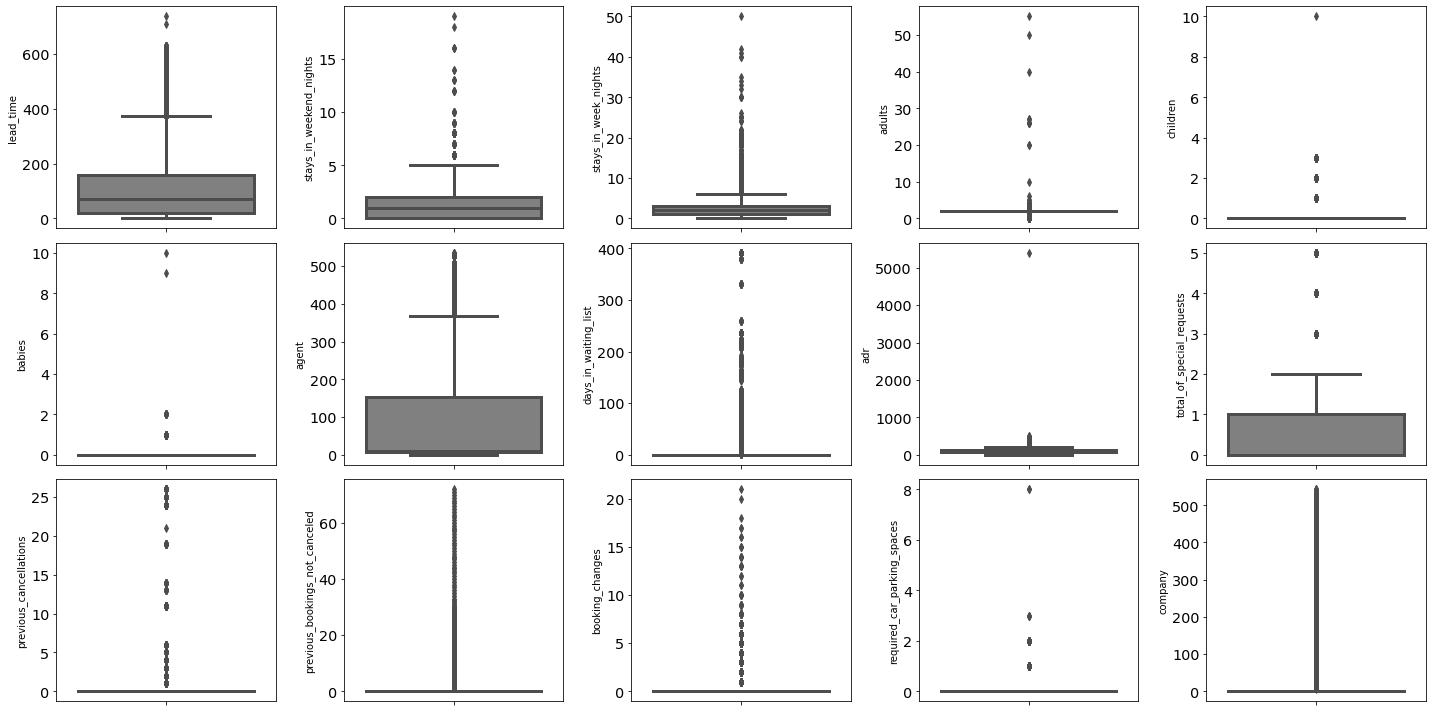

In [9]:
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

Outlier di dalam dataset ini termasuk sedikit sehingga kami memutuskan untuk tidak menghapus outlier

Ex : outlier pada kolom adults (50) merupakan booking third-party, outlier pada kolom previous booking not canceled (72) merupakan repeated guest yang dari 79 bookingnya hanya men-cancel 6 booking

# Feature Transformation

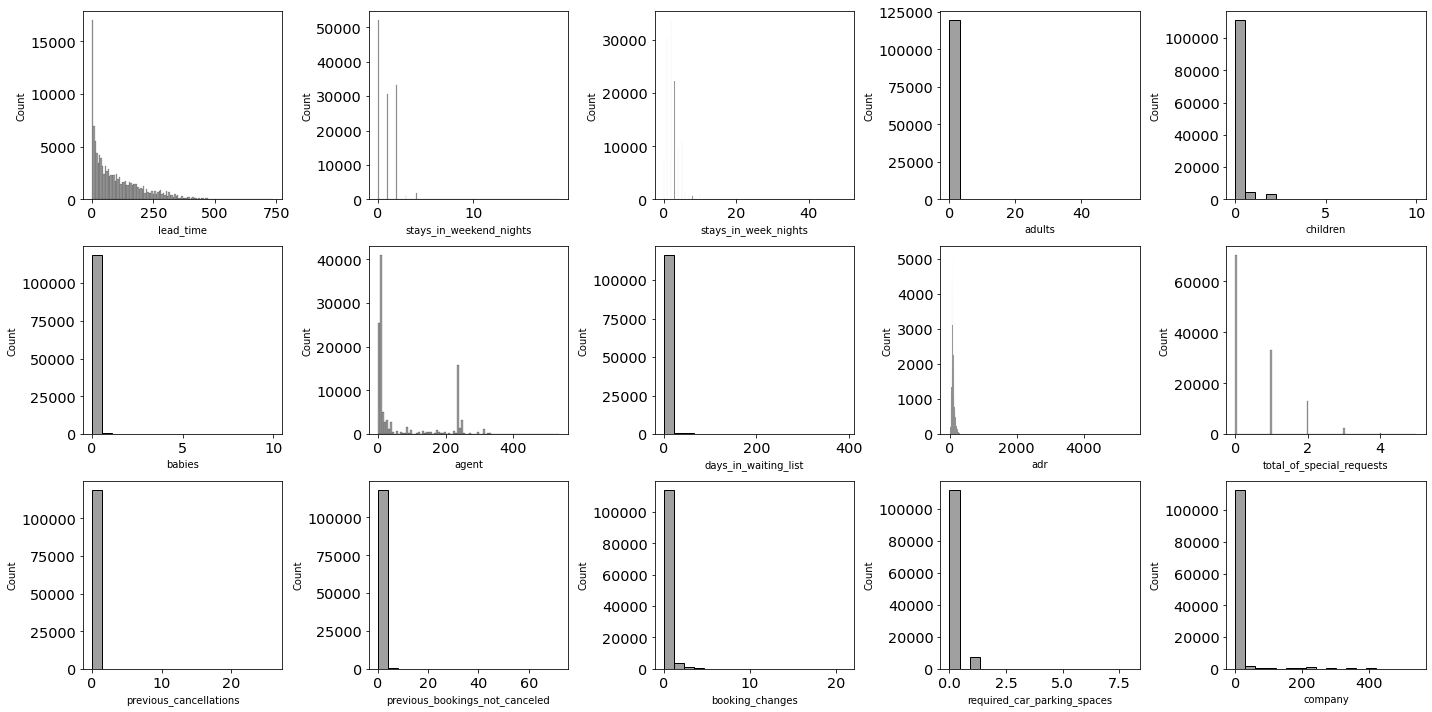

In [10]:
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)   # (baris, kolom, posisi)
    sns.histplot(df[nums[i]], color='gray')
    plt.tight_layout()

# Feature Extraction

In [11]:
#fitur country, local & international 

country_type = []

for index, kolom in df.iterrows():
    country = kolom['country']

    if country == 'PRT':
        result = 'local'
    else:
        result = 'international'
        
    country_type.append(result)
    
df['country_type'] = country_type

pd.set_option('display.max_columns', None)
df[7: 14]

hotel  is_canceled  lead_time  arrival_date_year  \
7   Resort Hotel            0          9               2015   
8   Resort Hotel            1         85               2015   
9   Resort Hotel            1         75               2015   
10  Resort Hotel            1         23               2015   
11  Resort Hotel            0         35               2015   
12  Resort Hotel            0         68               2015   
13  Resort Hotel            0         18               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
7                July                        27                          1   
8                July                        27                          1   
9                July                        27                          1   
10               July                        27                          1   
11               July                        27                          1   
12               July                        27                          1   
13               July                        27                          1   

    stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
7                         0                     2       2       0.0       0   
8                         0                     3       2       0.0       0   
9                         0                     3       2       0.0       0   
10                        0                     4       2       0.0       0   
11                        0                     4       2       0.0       0   
12                        0                     4       2       0.0       0   
13                        0                     4       2       1.0       0   

   meal country market_segment distribution_channel  is_repeated_guest  \
7    FB     PRT         Direct               Direct                  0   
8    BB     PRT      Online TA                TA/TO                  0   
9    HB     PRT  Offline TA/TO                TA/TO                  0   
10   BB     PRT      Online TA                TA/TO                  0   
11   HB     PRT      Online TA                TA/TO                  0   
12   BB     USA      Online TA                TA/TO                  0   
13   HB     ESP      Online TA                TA/TO                  0   

    previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
7                        0                               0                  C   
8                        0                               0                  A   
9                        0                               0                  D   
10                       0                               0                  E   
11                       0                               0                  D   
12                       0                               0                  D   
13                       0                               0                  G   

   assigned_room_type  booking_changes deposit_type  agent  company  \
7                   C                0   No Deposit  303.0      0.0   
8                   A                0   No Deposit  240.0      0.0   
9                   D                0   No Deposit   15.0      0.0   
10                  E                0   No Deposit  240.0      0.0   
11                  D                0   No Deposit  240.0      0.0   
12                  E                0   No Deposit  240.0      0.0   
13                  G                1   No Deposit  241.0      0.0   

    days_in_waiting_list customer_type     adr  required_car_parking_spaces  \
7                      0     Transient  103.00                            0   
8                      0     Transient   82.00                            0   
9                      0     Transient  105.50                            0   
10                     0     Transient  123.00                            0   
11                     0     Transient  14

In [12]:
#fitur match reserved room type

match_reserved_room_type = []

for index, kolom in df.iterrows():
    reserved_room_type = kolom['reserved_room_type']
    assigned_room_type = kolom['assigned_room_type']

    if reserved_room_type == assigned_room_type:
        result = 1 #artinya room nya match dgn apa yg dia book/reserve
    else:
        result = 0
    match_reserved_room_type.append(result)
    
df['match_reserved_room_type'] = match_reserved_room_type

pd.set_option('display.max_columns', None)
df[7: 14]

hotel  is_canceled  lead_time  arrival_date_year  \
7   Resort Hotel            0          9               2015   
8   Resort Hotel            1         85               2015   
9   Resort Hotel            1         75               2015   
10  Resort Hotel            1         23               2015   
11  Resort Hotel            0         35               2015   
12  Resort Hotel            0         68               2015   
13  Resort Hotel            0         18               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
7                July                        27                          1   
8                July                        27                          1   
9                July                        27                          1   
10               July                        27                          1   
11               July                        27                          1   
12               July                        27                          1   
13               July                        27                          1   

    stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
7                         0                     2       2       0.0       0   
8                         0                     3       2       0.0       0   
9                         0                     3       2       0.0       0   
10                        0                     4       2       0.0       0   
11                        0                     4       2       0.0       0   
12                        0                     4       2       0.0       0   
13                        0                     4       2       1.0       0   

   meal country market_segment distribution_channel  is_repeated_guest  \
7    FB     PRT         Direct               Direct                  0   
8    BB     PRT      Online TA                TA/TO                  0   
9    HB     PRT  Offline TA/TO                TA/TO                  0   
10   BB     PRT      Online TA                TA/TO                  0   
11   HB     PRT      Online TA                TA/TO                  0   
12   BB     USA      Online TA                TA/TO                  0   
13   HB     ESP      Online TA                TA/TO                  0   

    previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
7                        0                               0                  C   
8                        0                               0                  A   
9                        0                               0                  D   
10                       0                               0                  E   
11                       0                               0                  D   
12                       0                               0                  D   
13                       0                               0                  G   

   assigned_room_type  booking_changes deposit_type  agent  company  \
7                   C                0   No Deposit  303.0      0.0   
8                   A                0   No Deposit  240.0      0.0   
9                   D                0   No Deposit   15.0      0.0   
10                  E                0   No Deposit  240.0      0.0   
11                  D                0   No Deposit  240.0      0.0   
12                  E                0   No Deposit  240.0      0.0   
13                  G                1   No Deposit  241.0      0.0   

    days_in_waiting_list customer_type     adr  required_car_parking_spaces  \
7                      0     Transient  103.00                            0   
8                      0     Transient   82.00                            0   
9                      0     Transient  105.50                            0   
10                     0     Transient  123.00                            0   
11                     0     Transient  14

In [13]:
#fitur total_guest

total_guest = (df['adults']+df['babies']+df['children'])
    
df['total_guest'] = total_guest

pd.set_option('display.max_columns', None)
df[7: 14]

hotel  is_canceled  lead_time  arrival_date_year  \
7   Resort Hotel            0          9               2015   
8   Resort Hotel            1         85               2015   
9   Resort Hotel            1         75               2015   
10  Resort Hotel            1         23               2015   
11  Resort Hotel            0         35               2015   
12  Resort Hotel            0         68               2015   
13  Resort Hotel            0         18               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
7                July                        27                          1   
8                July                        27                          1   
9                July                        27                          1   
10               July                        27                          1   
11               July                        27                          1   
12               July                        27                          1   
13               July                        27                          1   

    stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
7                         0                     2       2       0.0       0   
8                         0                     3       2       0.0       0   
9                         0                     3       2       0.0       0   
10                        0                     4       2       0.0       0   
11                        0                     4       2       0.0       0   
12                        0                     4       2       0.0       0   
13                        0                     4       2       1.0       0   

   meal country market_segment distribution_channel  is_repeated_guest  \
7    FB     PRT         Direct               Direct                  0   
8    BB     PRT      Online TA                TA/TO                  0   
9    HB     PRT  Offline TA/TO                TA/TO                  0   
10   BB     PRT      Online TA                TA/TO                  0   
11   HB     PRT      Online TA                TA/TO                  0   
12   BB     USA      Online TA                TA/TO                  0   
13   HB     ESP      Online TA                TA/TO                  0   

    previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
7                        0                               0                  C   
8                        0                               0                  A   
9                        0                               0                  D   
10                       0                               0                  E   
11                       0                               0                  D   
12                       0                               0                  D   
13                       0                               0                  G   

   assigned_room_type  booking_changes deposit_type  agent  company  \
7                   C                0   No Deposit  303.0      0.0   
8                   A                0   No Deposit  240.0      0.0   
9                   D                0   No Deposit   15.0      0.0   
10                  E                0   No Deposit  240.0      0.0   
11                  D                0   No Deposit  240.0      0.0   
12                  E                0   No Deposit  240.0      0.0   
13                  G                1   No Deposit  241.0      0.0   

    days_in_waiting_list customer_type     adr  required_car_parking_spaces  \
7                      0     Transient  103.00                            0   
8                      0     Transient   82.00                            0   
9                      0     Transient  105.50                            0   
10                     0     Transient  123.00                            0   
11                     0     Transient  14

In [14]:
# fitur total stay (gabungin weekend night, week night)

total_stay = (df['stays_in_weekend_nights']+df['stays_in_week_nights'])
    
df['total_stay'] = total_stay

pd.set_option('display.max_columns', None)
df[7: 14]

hotel  is_canceled  lead_time  arrival_date_year  \
7   Resort Hotel            0          9               2015   
8   Resort Hotel            1         85               2015   
9   Resort Hotel            1         75               2015   
10  Resort Hotel            1         23               2015   
11  Resort Hotel            0         35               2015   
12  Resort Hotel            0         68               2015   
13  Resort Hotel            0         18               2015   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
7                July                        27                          1   
8                July                        27                          1   
9                July                        27                          1   
10               July                        27                          1   
11               July                        27                          1   
12               July                        27                          1   
13               July                        27                          1   

    stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
7                         0                     2       2       0.0       0   
8                         0                     3       2       0.0       0   
9                         0                     3       2       0.0       0   
10                        0                     4       2       0.0       0   
11                        0                     4       2       0.0       0   
12                        0                     4       2       0.0       0   
13                        0                     4       2       1.0       0   

   meal country market_segment distribution_channel  is_repeated_guest  \
7    FB     PRT         Direct               Direct                  0   
8    BB     PRT      Online TA                TA/TO                  0   
9    HB     PRT  Offline TA/TO                TA/TO                  0   
10   BB     PRT      Online TA                TA/TO                  0   
11   HB     PRT      Online TA                TA/TO                  0   
12   BB     USA      Online TA                TA/TO                  0   
13   HB     ESP      Online TA                TA/TO                  0   

    previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
7                        0                               0                  C   
8                        0                               0                  A   
9                        0                               0                  D   
10                       0                               0                  E   
11                       0                               0                  D   
12                       0                               0                  D   
13                       0                               0                  G   

   assigned_room_type  booking_changes deposit_type  agent  company  \
7                   C                0   No Deposit  303.0      0.0   
8                   A                0   No Deposit  240.0      0.0   
9                   D                0   No Deposit   15.0      0.0   
10                  E                0   No Deposit  240.0      0.0   
11                  D                0   No Deposit  240.0      0.0   
12                  E                0   No Deposit  240.0      0.0   
13                  G                1   No Deposit  241.0      0.0   

    days_in_waiting_list customer_type     adr  required_car_parking_spaces  \
7                      0     Transient  103.00                            0   
8                      0     Transient   82.00                            0   
9                      0     Transient  105.50                            0   
10                     0     Transient  123.00                            0   
11                     0     Transient  14

In [15]:
# fitur book_type from agent company

book_type = []

for index, kolom in df.iterrows():
    agent = kolom['agent']
    company = kolom['company']

    if agent > 0:
        result = 'third party'
    elif company > 0 :
        result = 'third_party'
    else:
        result = 'self-booking'
    book_type.append(result)
    
df['book_type'] = book_type

pd.set_option('display.max_columns', None)
df.sample(10)

hotel  is_canceled  lead_time  arrival_date_year  \
40077    City Hotel            0         43               2015   
31088  Resort Hotel            0         11               2016   
23068  Resort Hotel            0         34               2016   
1873   Resort Hotel            0         61               2015   
44064    City Hotel            0         42               2015   
27630  Resort Hotel            0        228               2016   
86678    City Hotel            0         55               2016   
52401    City Hotel            1        163               2016   
58522    City Hotel            1        461               2016   
90252    City Hotel            0         59               2016   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40077               July                        27                          3   
31088           December                        51                         12   
23068              April                        16                         11   
1873           September                        38                         19   
44064          September                        40                         30   
27630             August                        36                         29   
86678              April                        15                          6   
52401               June                        24                          5   
58522            October                        42                         13   
90252                May                        22                         28   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
40077                        0                     2       2       0.0   
31088                        1                     1       1       0.0   
23068                        1                     3       2       0.0   
1873                         2                     2       2       0.0   
44064                        0                     1       2       0.0   
27630                        2                     5       2       0.0   
86678                        0                     1       2       0.0   
52401                        2                     2       1       0.0   
58522                        0                     2       2       0.0   
90252                        2                     5       3       0.0   

       babies meal country market_segment distribution_channel  \
40077       0   HB     PRT         Groups                TA/TO   
31088       0   BB     ITA      Online TA                TA/TO   
23068       0   FB     PRT  Offline TA/TO                TA/TO   
1873        0   BB     ITA         Direct               Direct   
44064       0   BB     USA      Online TA                TA/TO   
27630       0   BB     PRT  Offline TA/TO                TA/TO   
86678       0   HB     PRT  Offline TA/TO                TA/TO   
52401       0   BB     PRT  Offline TA/TO                TA/TO   
58522       0   BB     PRT         Groups                TA/TO   
90252       0   BB     CHE      Online TA                TA/TO   

       is_repeated_guest  previous_cancellations  \
40077                  0                       0   
31088                  0                       0   
23068                  0                       0   
1873                   0                       0   
44064                  0                       0   
27630                  0                       0   
86678                  0                       0   
52401                  0                       0   
58522                  0                       0   
90252                  0                       0   

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
40077                               0                  A                  A   
31088                               0                  A                  D   
23068                               0      

# Feature Encoding

In [16]:
for cat in ['hotel', 'meal','deposit_type','customer_type','market_segment','distribution_channel','book_type', 'match_reserved_room_type','country_type']:
  onehots = pd.get_dummies(df[cat], prefix=cat)
  df = df.join(onehots)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 75 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [17]:
df = df.drop(columns=['name', 'email', 'phone-number','credit_card','hotel', 'meal','deposit_type','customer_type','market_segment','distribution_channel',
                      'book_type', 'match_reserved_room_type', 'country_type','adults','babies','children','country','assigned_room_type',
                     'reserved_room_type','agent','company','reservation_status','stays_in_weekend_nights', 'stays_in_week_nights'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   is_repeated_guest               119390 non-null  int64  
 7   previous_cancellations          119390 non-null  int64  
 8   previous_bookings_not_canceled  119390 non-null  int64  
 9   booking_changes                 119390 non-null  int64  
 10  days_in_waiting_list            119390 non-null  int64  
 11  adr                             119390 non-null  float64
 12  required_car_par

In [18]:
df.sample()

is_canceled  lead_time  arrival_date_year arrival_date_month  \
115924            0        153               2017               July   

        arrival_date_week_number  arrival_date_day_of_month  \
115924                        28                         11   

        is_repeated_guest  previous_cancellations  \
115924                  0                       0   

        previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
115924                               0                0                     0   

          adr  required_car_parking_spaces  total_of_special_requests  \
115924  141.3                            0                          0   

       reservation_status_date  total_guest  total_stay  hotel_City Hotel  \
115924              2017-07-13          2.0           2                 1   

        hotel_Resort Hotel  meal_BB  meal_FB  meal_HB  meal_SC  \
115924                   0        0        0        1        0   

        meal_Undefined  deposit_type_No Deposit  deposit_type_Non Refund  \
115924               0                        1                        0   

        deposit_type_Refundable  customer_type_Contract  customer_type_Group  \
115924                        0                       0                    0   

        customer_type_Transient  customer_type_Transient-Party  \
115924                        1                              0   

        market_segment_Aviation  market_segment_Complementary  \
115924                        0                             0   

        market_segment_Corporate  market_segment_Direct  \
115924                         0                      0   

        market_segment_Groups  market_segment_Offline TA/TO  \
115924                      0                             0   

        market_segment_Online TA  market_segment_Undefined  \
115924                         1                         0   

        distribution_channel_Corporate  distribution_channel_Direct  \
115924                               0                            0   

        distribution_channel_GDS  distribution_channel_TA/TO  \
115924                         0                           1   

        distribution_channel_Undefined  book_type_self-booking  \
115924                               0                       0   

        book_type_third party  book_type_third_party  \
115924                      1                      0   

        match_reserved_room_type_0  match_reserved_room_type_1  \
115924                           0                           1   

        country_type_international  country_type_local  
115924                           0                   1

# Class Imbalance

In [19]:
class_imbalance_percentage = df['is_canceled'].value_counts()* 100 / len(df)
class_imbalance = pd.DataFrame({' total_row' : df['is_canceled'].value_counts(),
                                 'percentage': round(class_imbalance_percentage,3)})
class_imbalance 

total_row  percentage
0       75166      62.958
1       44224      37.042

Jadi karna si class imbalance yg minoritas [1] itu cuma 37%, di simpulkan bahwa ini class imbalance nya termasuk mild

In [20]:
df.corr()

is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.293123           0.016660   
lead_time                          0.293123   1.000000           0.040142   
arrival_date_year                  0.016660   0.040142           1.000000   
arrival_date_week_number           0.008148   0.126871          -0.540561   
arrival_date_day_of_month         -0.006130   0.002268          -0.000221   
is_repeated_guest                 -0.084793  -0.124410           0.010341   
previous_cancellations             0.110133   0.086042          -0.119822   
previous_bookings_not_canceled    -0.057358  -0.073548           0.029218   
booking_changes                   -0.144381   0.000149           0.030872   
days_in_waiting_list               0.054186   0.170084          -0.056497   
adr                                0.047557  -0.063077           0.197580   
required_car_parking_spaces       -0.195498  -0.116451          -0.013684   
total_of_special_requests         -0.234658  -0.095712           0.108531   
total_guest                        0.046522   0.072265           0.052127   
total_stay                         0.017779   0.157167           0.031438   
hotel_City Hotel                   0.136531   0.075381           0.035267   
hotel_Resort Hotel                -0.136531  -0.075381          -0.035267   
meal_BB                            0.013124  -0.038259          -0.032865   
meal_FB                            0.038828   0.009714          -0.057964   
meal_HB                           -0.019845   0.136633          -0.057955   
meal_SC                            0.001282  -0.097617           0.128706   
meal_Undefined                    -0.025896  -0.015512           0.007213   
deposit_type_No Deposit           -0.477911  -0.380233           0.065736   
deposit_type_Non Refund            0.481457   0.380179          -0.065963   
deposit_type_Refundable           -0.011312   0.016587          -0.000760   
customer_type_Contract            -0.023670   0.068541          -0.171738   
customer_type_Group               -0.038698  -0.031924          -0.010982   
customer_type_Transient            0.133084  -0.173959           0.227954   
customer_type_Transient-Party     -0.124135   0.159548          -0.163588   
market_segment_Aviation           -0.013946  -0.041554           0.019390   
market_segment_Complementary      -0.039306  -0.067184          -0.010135   
market_segment_Corporate          -0.081667  -0.165075          -0.025186   
market_segment_Direct             -0.154390  -0.174111           0.013156   
market_segment_Groups              0.221859   0.346275          -0.106530   
market_segment_Offline TA/TO      -0.028472   0.146307          -0.123760   
market_segment_Online TA          -0.006288  -0.186304           0.181268   
market_segment_Undefined           0.005336  -0.003926          -0.006691   
distribution_channel_Corporate    -0.075428  -0.134609          -0.030312   
distribution_channel_Direct       -0.151620  -0.161594          -0.000604   
distribution_channel_GDS          -0.014891  -0.031365           0.016735   
distribution_channel_TA/TO         0.175944   0.221734           0.017064   
distribution_channel_Undefined     0.005757  -0.004906          -0.010580   
book_type_self-booking            -0.048065  -0.122988          -0.003628   
book_type_third party              0.102068   0.180031          -0.000238   
book_type_third_party             -0.096020  -0.123490           0.004715   
match_reserved_room_type_0        -0.247770  -0.142220          -0.097402   
match_reserved_room_type_1         0.247770   0.142220           0.097402   
country_type_international        -0.331595  -0.083846           0.194382   
country_type_local                 0.331595   0.083846          -0.194382   

                                arrival_date_week_number  \
is_canceled                                     0.008148   
lead_time                                       0.126871   
a

<AxesSubplot:>

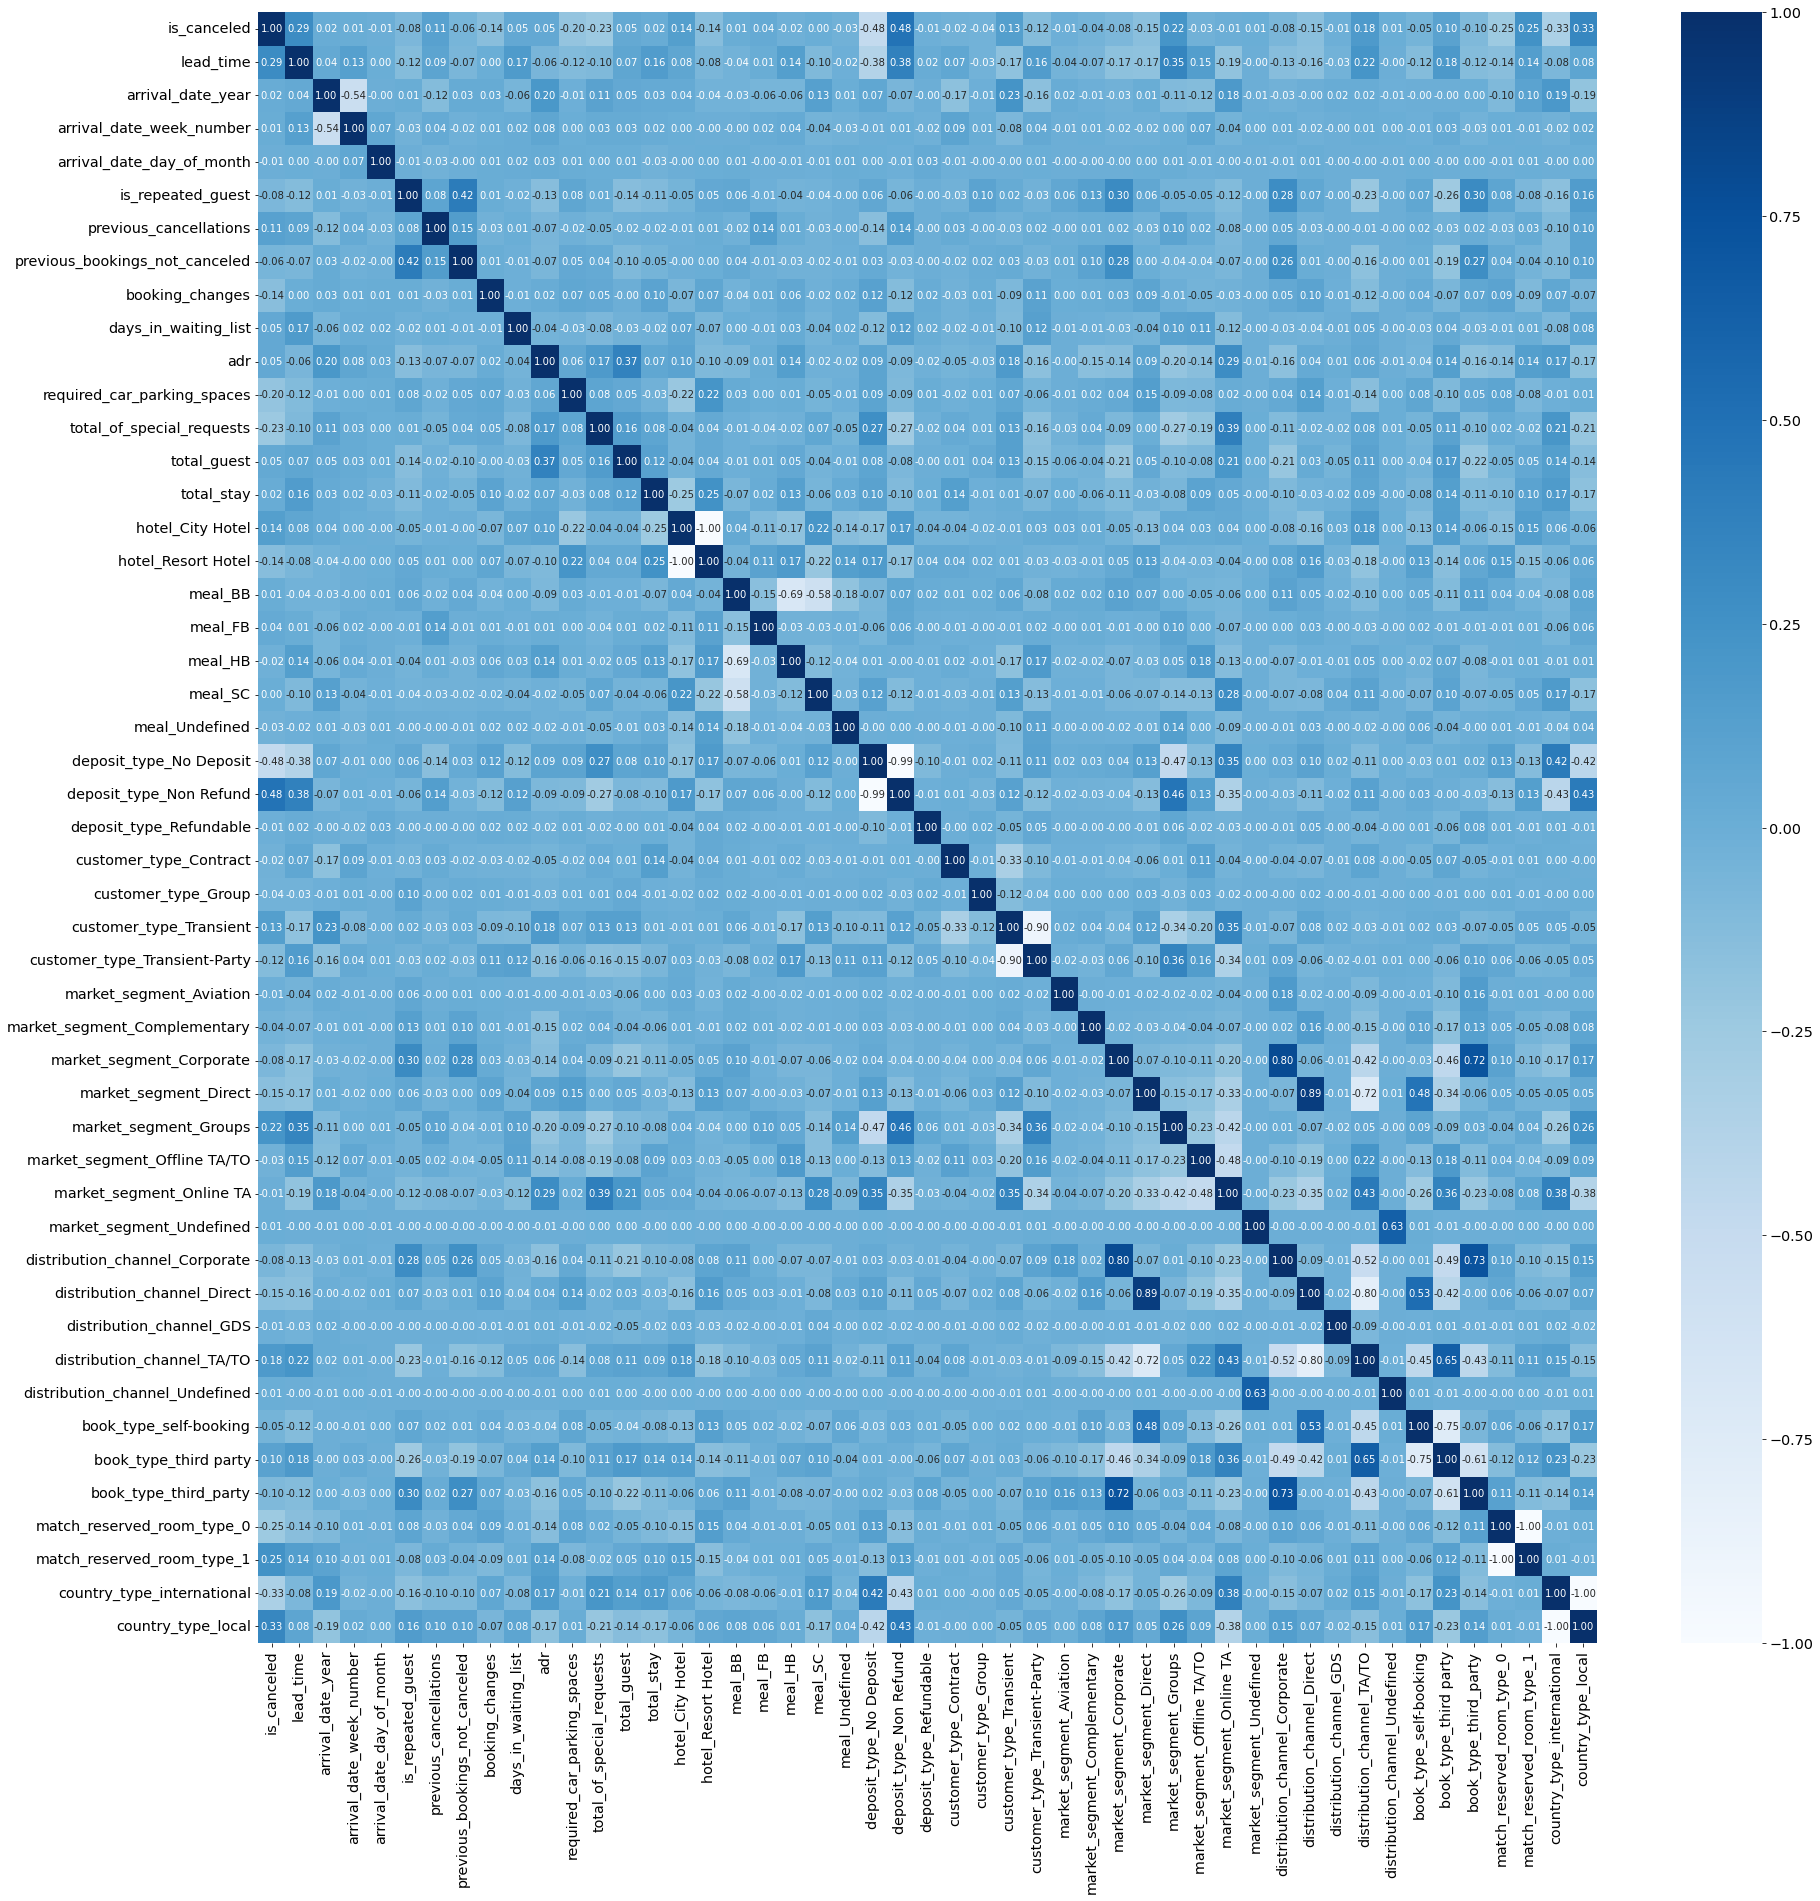

In [21]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')